In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [4]:
trans = pd.read_csv('../data/Transactions.csv')
cust = pd.read_csv('../data/CustomerDemographics.csv')

In [5]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [6]:
cust.head()

,customer_id,full_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70
1,2,Eli Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43
2,3,Arlin Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,70
3,4,Talbot,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0,62
4,5,Sheila-kathryn Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,46


In [7]:
print("Total records (rows) in the Customer Demographics Dataset : {}".format(cust.shape[0]))
print("Total features (columns) in the Customer Demographics Dataset : {}".format(cust.shape[1]))

Total records (rows) in the Customer Demographics Dataset : 3912
Total features (columns) in the Customer Demographics Dataset : 12


In [8]:
merged_trans_cust = pd.merge(trans, cust, left_on='customer_id', right_on='customer_id', how='inner')


In [9]:
merged_trans_cust.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,69
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,45
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,Male,9,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0,46
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,Male,83,1962-01-14,Staff Scientist,Financial Services,Mass Customer,N,No,16.0,62
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,Female,29,1996-12-15,Missing,Retail,Affluent Customer,N,Yes,2.0,27


In [10]:
merged_trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19542 entries, 0 to 19541
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19542 non-null  int64  
 1   product_id                           19542 non-null  int64  
 2   customer_id                          19542 non-null  int64  
 3   transaction_date                     19542 non-null  object 
 4   online_order                         19542 non-null  float64
 5   order_status                         19542 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19542 non-null  float64
 11  standard_cost               

In [11]:
merged_trans_cust['transaction_date']= pd.to_datetime(merged_trans_cust['transaction_date'])


### RFM Analysis
RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service. There is a segment of customer who is the big spender but what if they purchased only once or how recently they purchased? Do they often purchase our product? Also, It helps managers to run an effective promotional campaign for personalized service.

**Recency (R)**: Who have purchased recently? Number of days since last purchase (least recency)

**Frequency (F)**: Who has purchased frequently? It means the total number of purchases. ( high frequency)

**Monetary Value(M)**: Who have high purchase amount? It means the total money customer spent (high monetary value)

In [12]:
max_trans_date = max(merged_trans_cust['transaction_date']).date()
max_trans_date

datetime.date(2017, 12, 30)

In [13]:
# Taking the last transaction date as a reference date for comparision and 
# finding the number of days between a transaction date and last transaction date to compute the recency.
comparison_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")
comparison_date

datetime.datetime(2017, 12, 30, 0, 0)

In [14]:
# Creating a RFM table that will contain all the values for recency , frequency and Monetray data. 

rfm_table = merged_trans_cust.groupby(['customer_id']).agg({'transaction_date': lambda date : (comparison_date - date.max()).days,
                                                            'product_id' : lambda prod_id : len(prod_id), 
                                                            'Profit' : lambda p : sum(p)})

In [17]:
rfm_table.rename(columns={'transaction_date' : 'recency', 
                        'product_id' : 'frequency',
                        'Profit' : 'monetary'} , inplace=True)

In [18]:
rfm_table.head()

,recency,frequency,monetary
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94


**r_quartile**: Represents the recency quartile. A value of 1 indicates that the customer's recency is in the lowest quartile, while a value of 4 indicates that the customer's recency is in the highest quartile.

**f_quartile**: Represents the frequency quartile. A value of 1 indicates that the customer's frequency is in the lowest quartile, while a value of 4 indicates that the customer's frequency is in the highest quartile.

**m_quartile**: Represents the monetary quartile. A value of 1 indicates that the customer's monetary value is in the lowest quartile, while a value of 4 indicates that the customer's monetary value is in the highest quartile.

In [19]:
# Dividing the recency, frequency and monetary into 4 quartiles (min, 25%, 50%, 75% and max).
# These values will help us to calculate RFM score for a customer and classify based on their RFM score.

rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, ['4','3','2','1'])
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, ['1','2','3','4'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, ['1','2','3','4'])

In [23]:
rfm_table.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
3,102,8,3362.81,1,4,3
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,2,2


**Recency (R)**: Recency is considered the most important factor because it reflects how recently a customer has interacted with the business. Customers who have made a purchase or engaged with the business recently are more likely to be responsive to marketing efforts and more likely to make repeat purchases. Therefore, it makes sense to prioritize recency in the RFM score calculation.

**Frequency (F)**: Frequency measures how often a customer makes purchases or engages with the business. While frequency is important, it is typically considered less critical than recency because a customer's recent activity is often a better predictor of future behavior. Nonetheless, customers who make frequent purchases are still valuable and should be recognized in the RFM score.

**Monetary (M)**: Monetary value represents the amount of money a customer spends on purchases. While monetary value is an important indicator of customer value, it is often less indicative of future behavior compared to recency and frequency. Therefore, it is given the least weight in the RFM score calculation.

In [37]:
rfm_table['r_quartile'] = rfm_table['r_quartile'].astype(str)
rfm_table['f_quartile'] = rfm_table['f_quartile'].astype(str)
rfm_table['m_quartile'] = rfm_table['m_quartile'].astype(str)

# Fill missing values with '0'
rfm_table['r_quartile'].fillna('0', inplace=True)
rfm_table['f_quartile'].fillna('0', inplace=True)
rfm_table['m_quartile'].fillna('0', inplace=True)



C:\Users\Sagnik\AppData\Local\Temp\ipykernel_15320\54827390.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rfm_table['r_quartile'].fillna('0', inplace=True)
C:\Users\Sagnik\AppData\Local\Temp\ipykernel_15320\54827390.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [42]:
rfm_table['r_quartile'] = rfm_table['r_quartile'].astype('int32')
rfm_table['f_quartile'] = rfm_table['f_quartile'].astype('int32')
rfm_table['m_quartile'].replace('nan', '0', inplace=True)

# Convert the column to integer type
rfm_table['m_quartile'] = rfm_table['m_quartile'].astype('int32')

C:\Users\Sagnik\AppData\Local\Temp\ipykernel_15320\1702031571.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rfm_table['m_quartile'].replace('nan', '0', inplace=True)


In [43]:
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3416 entries, 1 to 3500
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   recency     3416 non-null   int64  
 1   frequency   3416 non-null   int64  
 2   monetary    3233 non-null   float64
 3   r_quartile  3416 non-null   int32  
 4   f_quartile  3416 non-null   int32  
 5   m_quartile  3416 non-null   int32  
dtypes: float64(1), int32(3), int64(2)
memory usage: 146.8 KB


In [49]:
rfm_table['rfm_score'] = 100*rfm_table['r_quartile'].astype(int)+10*rfm_table['f_quartile'].astype(int)+rfm_table['m_quartile'].astype(int)
rfm_table['customer_title'] = pd.qcut(rfm_table['rfm_score'], 4, ['Bronze','Silver','Gold','Platinum'])

In [50]:
rfm_table.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,Platinum
2,128,3,2226.26,1,1,2,112,Bronze
3,102,8,3362.81,1,4,3,143,Bronze
4,195,2,220.57,1,1,1,111,Bronze
5,16,6,2394.94,4,2,2,422,Platinum


## Merging both RFM Table with Transaction and Customer Tables
The RFM_Table dataframe is merged with the Transactions and Customer Demographics datasets, to gain depper insights of Customer Segemnts along with transactions. The dataframes are joined based on customer_ids from both the datasets

In [51]:
cust_trans_rfm = pd.merge(merged_trans_cust, rfm_table, left_on='customer_id', right_on='customer_id', how='inner')
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19542 entries, 0 to 19541
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19542 non-null  int64         
 1   product_id                           19542 non-null  int64         
 2   customer_id                          19542 non-null  int64         
 3   transaction_date                     19542 non-null  datetime64[ns]
 4   online_order                         19542 non-null  float64       
 5   order_status                         19542 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

In [52]:
cust_trans_rfm.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,tenure,Age,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,10.0,69,75,3,645.99,2,1,1,211,Silver
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,10.0,45,20,7,4179.11,3,3,4,334,Gold
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,22.0,46,56,6,4965.43,2,2,4,224,Silver
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,16.0,62,121,7,3983.97,1,3,3,133,Bronze
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,2.0,27,75,10,6646.00,2,4,4,244,Silver


## Creating an Age Group Feature


In [54]:
cust_trans_rfm['Age_Group'] = cust_trans_rfm['Age'].apply(lambda x : (math.floor(x/10)+1)*10)


In [55]:
cust_trans_rfm['Age_Group']

0        70
1        50
2        50
3        70
4        30
         ..
19537    30
19538    50
19539    60
19540    70
19541    30
Name: Age_Group, Length: 19542, dtype: int64

## Creating a Detail Customer title / tag based on RFM Score
An extended version of customer title is made which divides the entire number of customers into 11 groups. The groups are mainly Platinum Customers, Very Loyal, Becoming Loyal, Recent Customers, Potential Customers, Late Bloomer, Loosing Customers, High Risk Customers, Almost Lost Customers, Evasive Customers and Lost Customers.
The demarkation of customers into the above mentioned groups is based on their RFM scores.

In [56]:
def cust_score_title_lkup(cols):
    
    rfm_score = cols[0]
    
    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'
# Applying the above functions and creating a new feature detail_cust_title

cust_trans_rfm['detail_cust_title']=cust_trans_rfm[['rfm_score']].apply(cust_score_title_lkup, axis=1)

C:\Users\Sagnik\AppData\Local\Temp\ipykernel_15320\193015945.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rfm_score = cols[0]


In [57]:
def get_rank(cols):
    
    title = cols[0]
    
    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11
        
# Applying the above functions and creating a new feature rank

cust_trans_rfm['rank']=cust_trans_rfm[['detail_cust_title']].apply(get_rank, axis=1)

C:\Users\Sagnik\AppData\Local\Temp\ipykernel_15320\1584783313.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  title = cols[0]


## Exporting to CSV File

In [59]:
cust_trans_rfm.to_csv('../data/Customer_Trans_RFM_Analysis.csv', index=False)
print("Total records in final dataset : {}".format(cust_trans_rfm.shape[0]))

Total records in final dataset : 19542


## Data Analysis and Exploration
**New Customer vs Old Customer Age Distributions**

Most New / Old Customers are aged between 40-49. The lowest age groups are under 20 and 80+ for both Old and New Customers dataset.

Among the New Customers the most populated age bracket is 20-29 and 60-69, while the maximum Old Customers are from the age bracket 50-69.

There is a steep drop in number of customers in 30-39 age groupsd among the New Customers.

In [62]:
new_cust = pd.read_csv('../data/NewCustomerList.csv')


C:\Users\Sagnik\AppData\Local\Temp\ipykernel_15320\1680103341.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_cust['Age Group'], kde=False, bins=15)


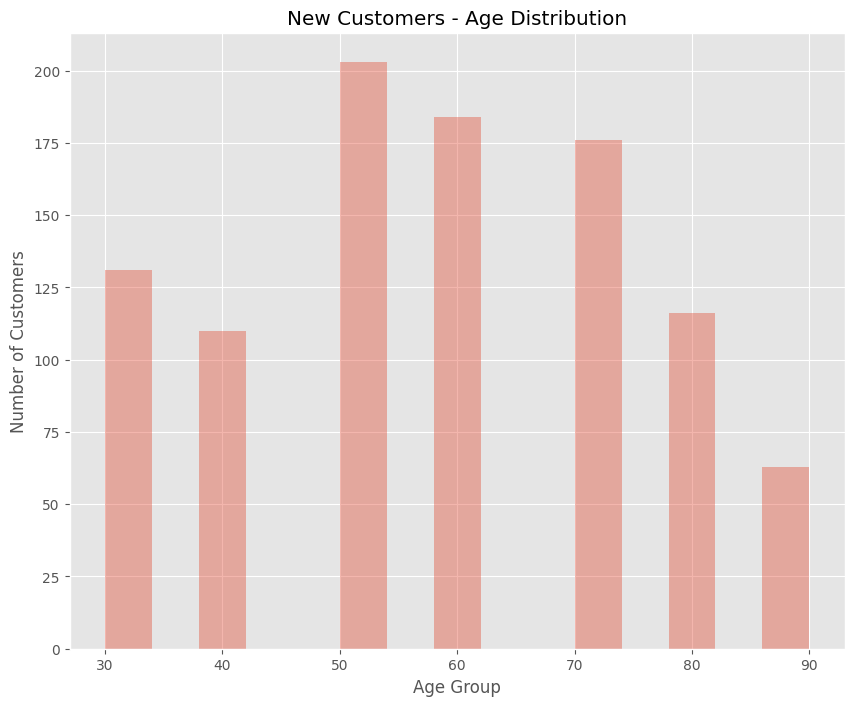

In [63]:
plt.figure(figsize=(10,8))
sns.distplot(new_cust['Age Group'], kde=False, bins=15)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Age Distribution')

plt.show()

C:\Users\Sagnik\AppData\Local\Temp\ipykernel_15320\1382980942.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cust_trans_rfm['Age_Group'], kde=False, bins=15)


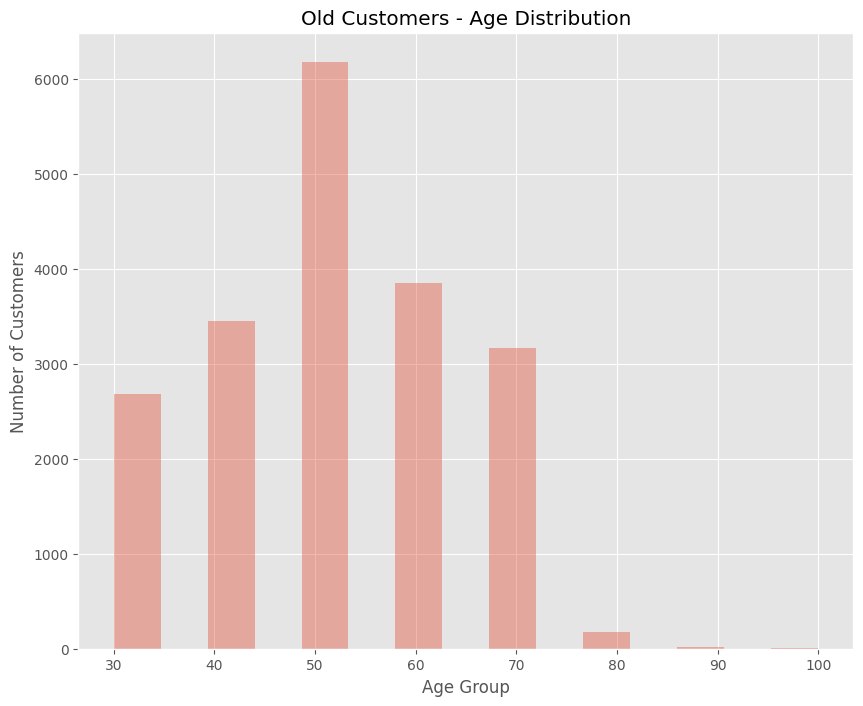

In [64]:
plt.figure(figsize=(10,8))
sns.distplot(cust_trans_rfm['Age_Group'], kde=False, bins=15)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Age Distribution')

plt.show()

## RFM Analysis Scatter Plots
**Recency vs Monetary**

The chart shows that customers who purchased recently generated more revenue than customers who visited long time ago. Customers from recent past (50-100) days generated a moderate revenue. Customers who visited 200 days ago generated a low revenue.

<Figure size 800x700 with 0 Axes>

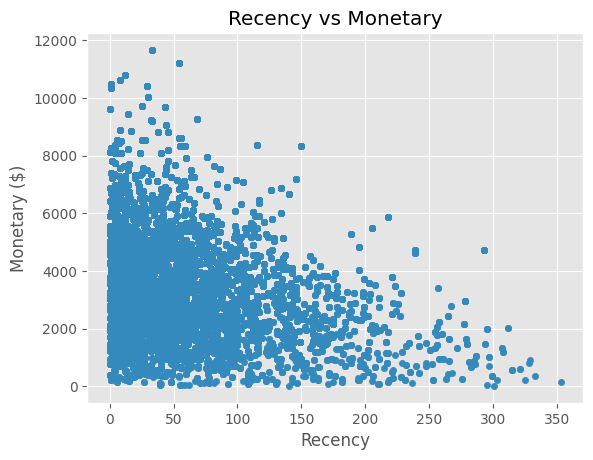

In [65]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='recency' , y='monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.show()

## Frequency vs Monetary
Customers classified as "Platinum Customers" , "Very Loyal" and "Becoming Loyal" visit frequently, which correlated with increased revenue for the business.



<Figure size 800x700 with 0 Axes>

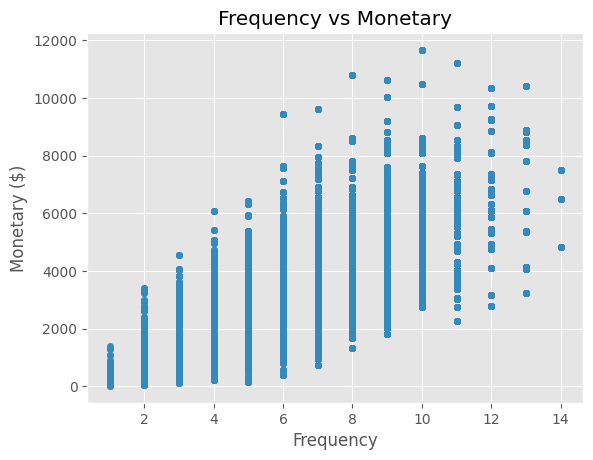

In [66]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='frequency' , y='monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')
plt.show()

## Customer Segment Distribution

In [67]:
# Calculating the number of unique customers under a customer title.

cust_per_title = cust_trans_rfm[['detail_cust_title', 'customer_id','rank']].drop_duplicates().groupby(
    ['detail_cust_title','rank']).size().reset_index().sort_values('rank')
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
7,Platinum Customer,1,153
10,Very Loyal,2,194
1,Becoming Loyal,3,335
9,Recent Customer,4,359
8,Potential Customer,5,354
4,Late Bloomer,6,328
5,Loosing Customer,7,347
3,High Risk Customer,8,353
0,Almost Lost Customer,9,317
2,Evasive Customer,10,384


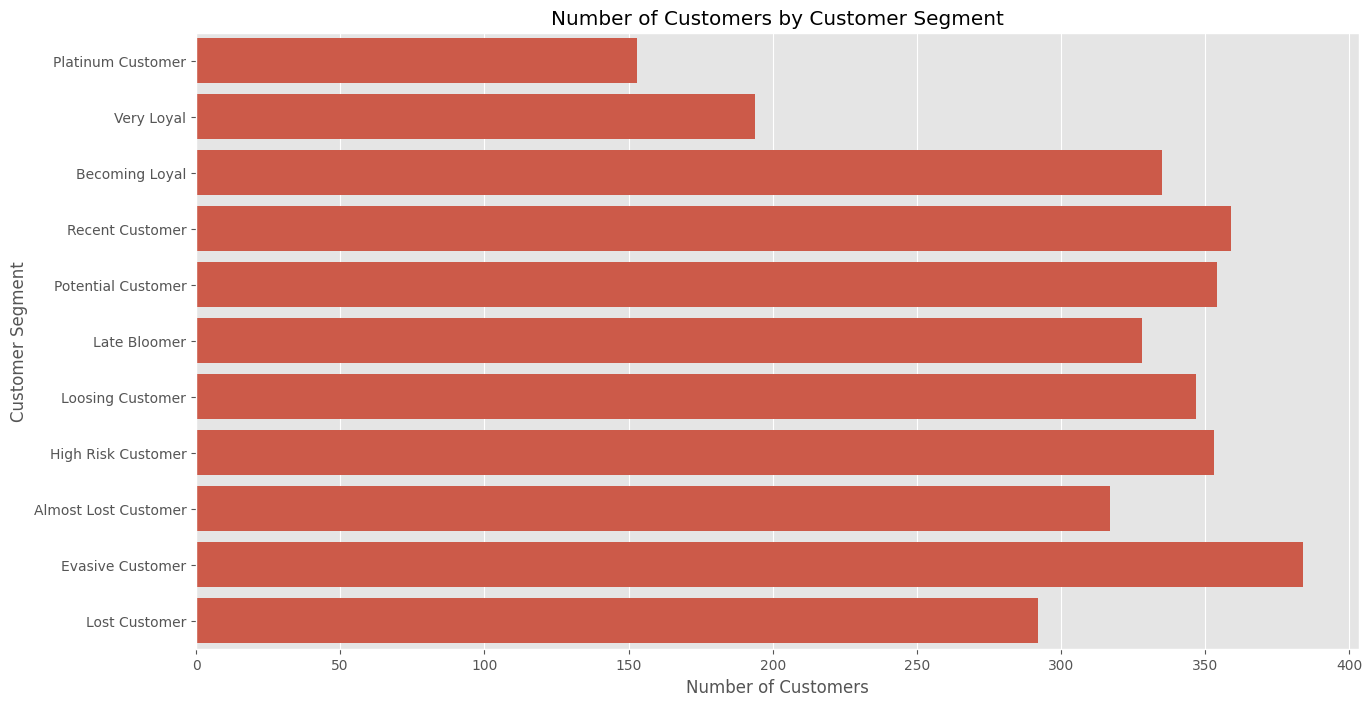

In [68]:
plt.figure(figsize=(15,8))
sns.barplot(y='detail_cust_title' , x='Number of Customers', data=cust_per_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()

In [ ]:
cust_trans_rfm = pd.read_csv('../data/Customer_Trans_RFM_Analysis.csv')

# Convert to Excel format
excel_file_path = '../data/Customer_Trans_RFM_Analysis.xlsx'
cust_trans_rfm.to_excel(excel_file_path, index=False)